In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import all the necessary packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer


In [ ]:
# Specify the folder where both CSV files are located
folder_path = '/content/drive/My Drive/SMC/'

# Read the train and test data
df_test = pd.read_csv(folder_path + 'drugsComTest_raw.csv')  # test data
df_train = pd.read_csv(folder_path + 'drugsComTrain_raw.csv')  # train data

In [ ]:
df_train.dtypes

,0
uniqueID,int64
drugName,object
condition,object
review,object
rating,int64
date,object
usefulCount,int64


In [ ]:
df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
print ("The shape of the train set given is : ", df_train.shape)
print ("The shape of the test set given is : ", df_test.shape)

The shape of the train set given is :  (161297, 7)
The shape of the test set given is :  (53766, 7)


In [ ]:
# Droping the data points with null values as it's very much less tha 5% of the whole dataset
df_train = df_train.dropna(how = 'any', axis = 0)
df_test = df_test.dropna(how = 'any', axis = 0)

In [ ]:
print ("The shape of the train df :",df_train.shape)
print ("The shape of the test df :", df_test.shape)

The shape of the train df : (160398, 7)
The shape of the test df : (53471, 7)


In [ ]:
# Merging the test and train data
merge = [df_train, df_test]
df_data = pd.concat(merge)
df_data.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [ ]:
df_data.shape

(213869, 7)

In [ ]:
df_data.columns = df_data.columns.str.lower()

In [ ]:
# Sorting the dataframe
df_data.sort_values(['uniqueid'], ascending = True, inplace = True)
df_data.reset_index(drop = True, inplace = True)

In [ ]:
df_data['condition'].isnull().sum(axis = 0)

0

In [ ]:
df_data.dtypes

,0
uniqueid,int64
drugname,object
condition,object
review,object
rating,int64
date,object
usefulcount,int64


In [ ]:
df_data.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,28-Oct-15,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,27-Oct-15,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,27-Oct-15,7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,26-Oct-15,12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,25-Oct-15,4
5,6,Medroxyprogesterone,Birth Control,"""This is a horrible shot!! I got my first shot...",1,24-Oct-15,3
6,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,22-Oct-15,6
7,8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Im 19 and have been having heavy and painful ...",5,21-Oct-15,2
8,9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m a 30 year old woman. I got the shot ...",2,21-Oct-15,5
9,10,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 17 years old and I got shot in Augus...",7,20-Oct-15,2


In [ ]:
df_data['condition'].nunique()

916

In [ ]:
df_data.loc[df_data['rating'] == 1, :]['drugname'].value_counts().head(10)

,count
drugname,
Miconazole,767
Ethinyl estradiol / norethindrone,728
Etonogestrel,707
Levonorgestrel,511
Nexplanon,504
Ethinyl estradiol / norgestimate,464
Medroxyprogesterone,443
Depo-Provera,417
Tioconazole,410


In [ ]:
df_data.at[df_data['usefulcount'].idxmin(), 'drugname']

'Medroxyprogesterone'

In [ ]:
df_data.loc[df_data['rating'] == 0, :].shape

(0, 7)

In [ ]:
df_data.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,28-Oct-15,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,27-Oct-15,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,27-Oct-15,7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,26-Oct-15,12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,25-Oct-15,4
5,6,Medroxyprogesterone,Birth Control,"""This is a horrible shot!! I got my first shot...",1,24-Oct-15,3
6,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,22-Oct-15,6
7,8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Im 19 and have been having heavy and painful ...",5,21-Oct-15,2
8,9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m a 30 year old woman. I got the shot ...",2,21-Oct-15,5
9,10,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 17 years old and I got shot in Augus...",7,20-Oct-15,2


In [ ]:
df_data.describe()

,uniqueid,rating,usefulcount
count,213869.000000,213869.000000,213869.000000
mean,116076.924786,6.991149,28.094118
std,67016.705794,3.275792,36.401377
min,0.000000,1.000000,0.000000
25%,58122.000000,5.000000,6.000000
50%,115972.000000,8.000000,16.000000
75%,174018.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [ ]:
# Converting the date in to date time format
df_data['date'] = pd.to_datetime(df_data['date'])

# Exploratory Data Analysis

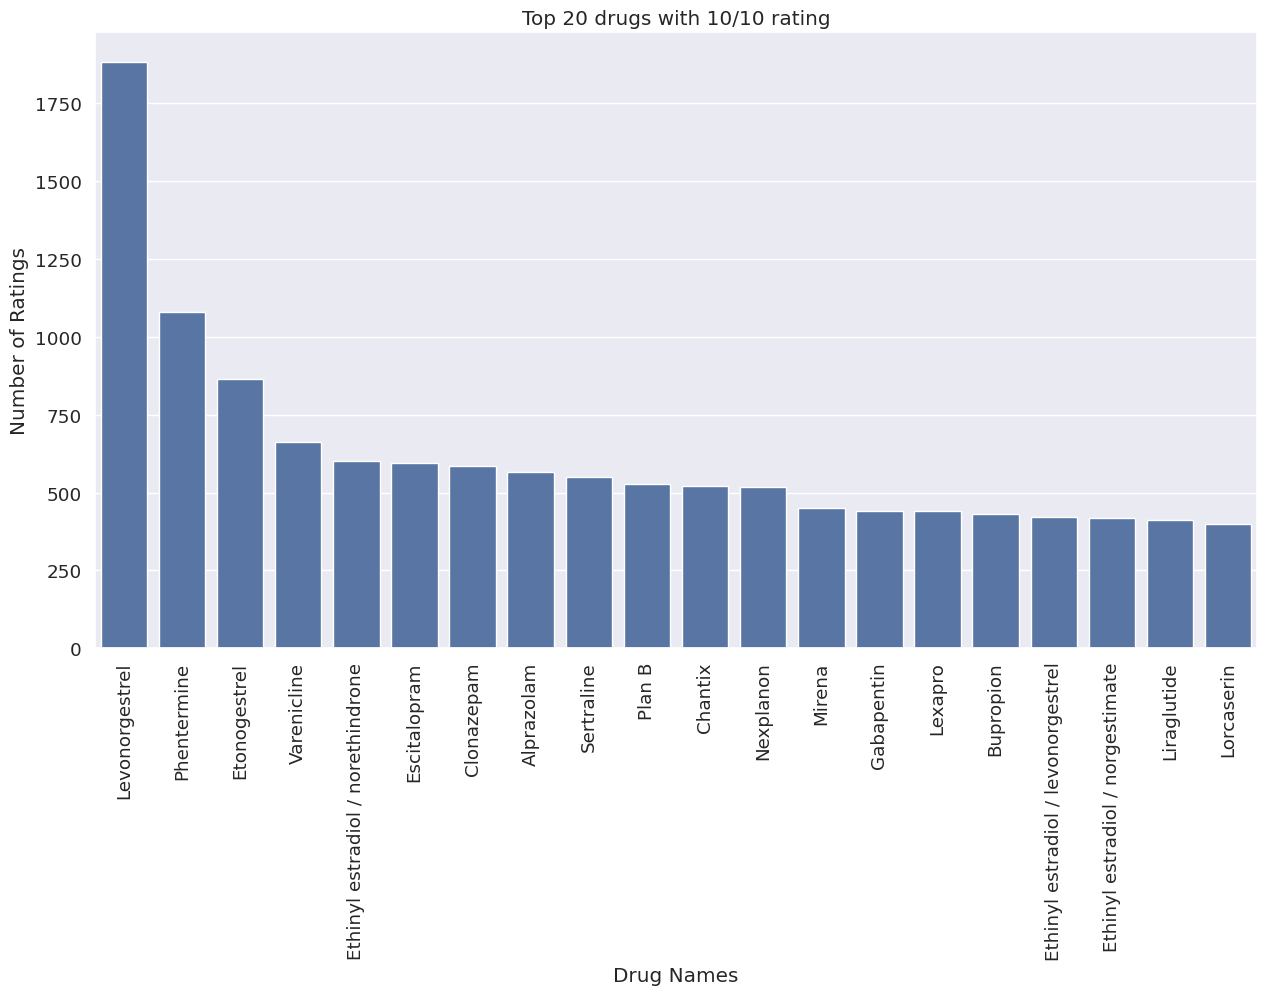

In [ ]:
# This barplot shows the top 20 drugs with the 10/10 rating
import seaborn as sns

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_data.loc[df_data.rating == 10, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

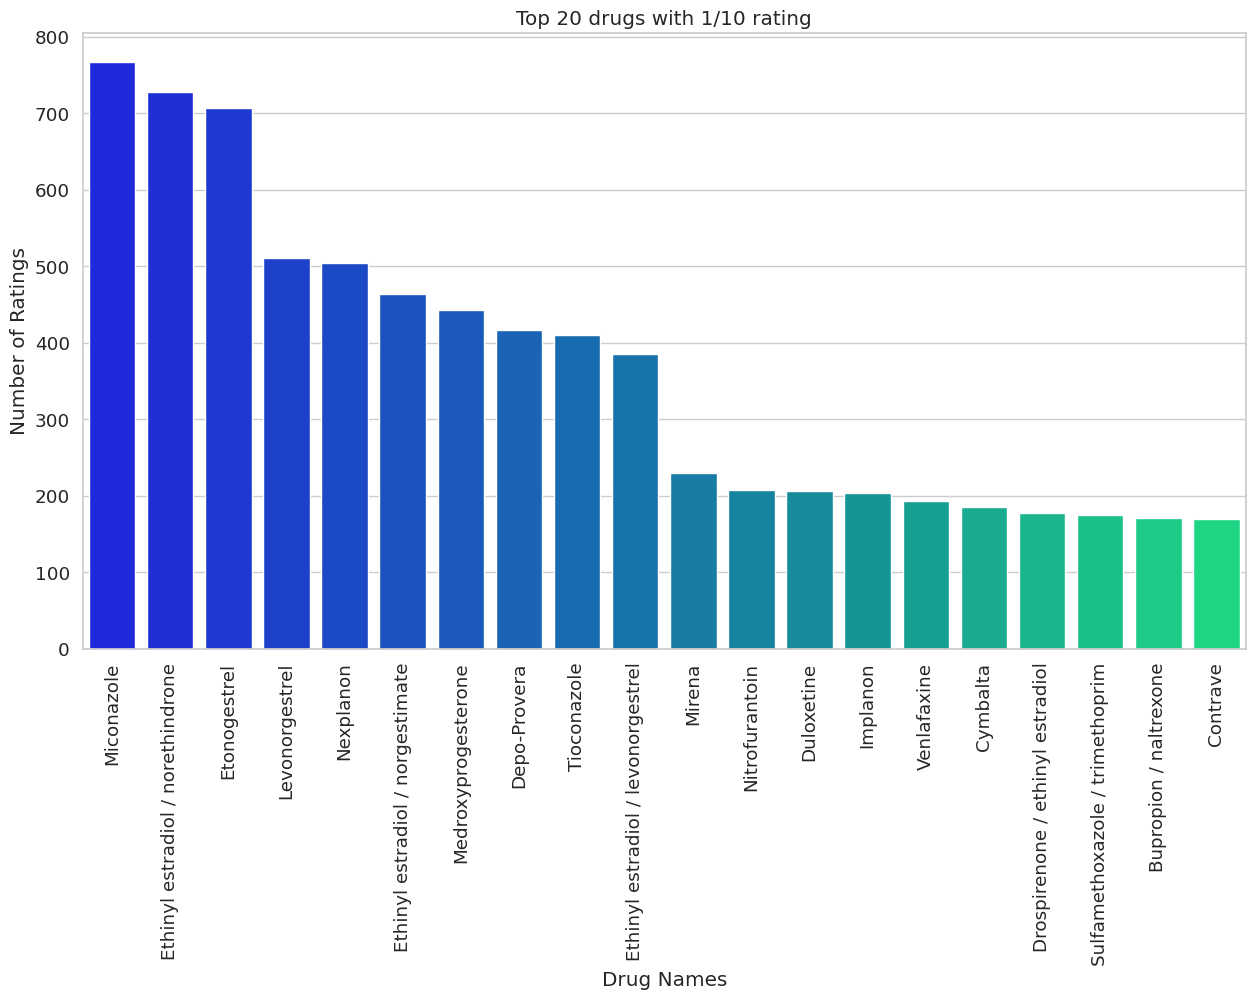

In [ ]:
# This barplot shows the Top 20 drugs with the 1/10 rating
import seaborn as sns

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_data.loc[df_data.rating == 1, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

Text(0.5, 0, 'Rating')

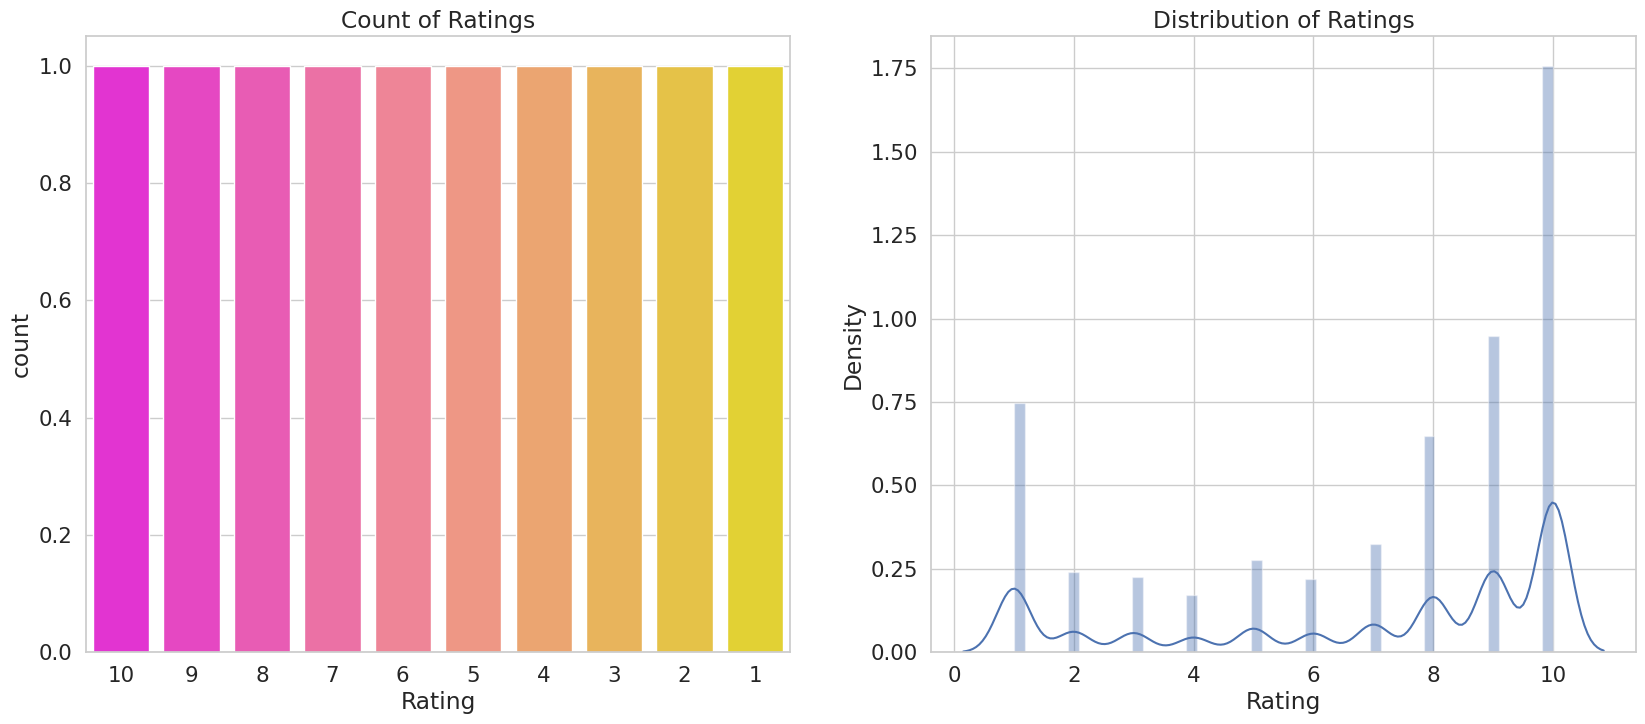

In [ ]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(df_data['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(df_data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

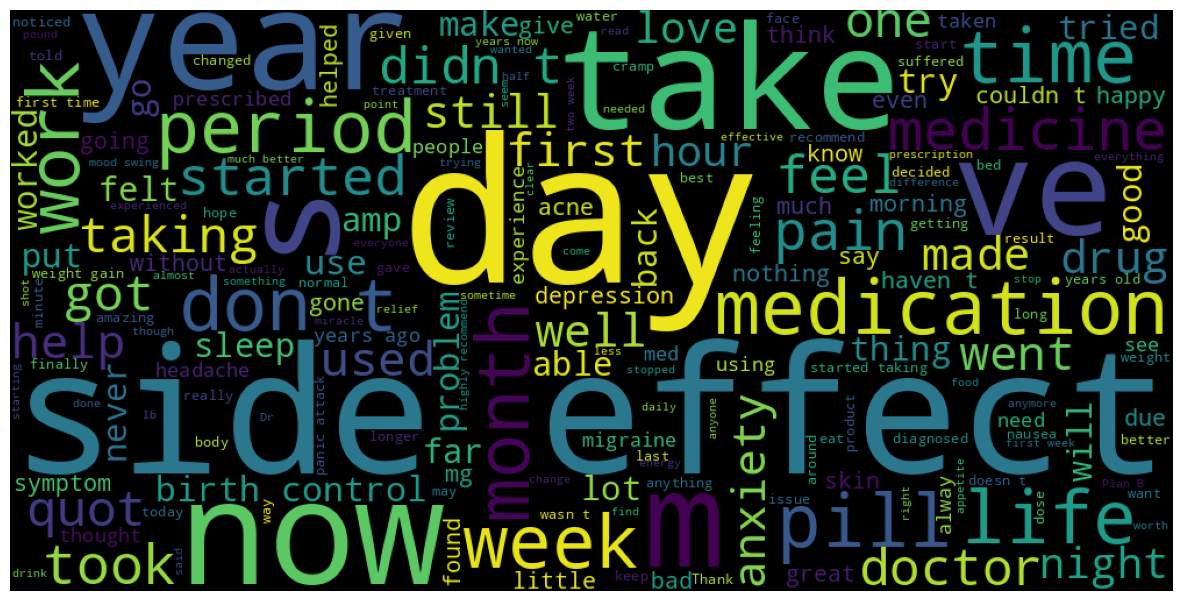

In [ ]:
# Word cloud of the reviews with rating equal to 10
df_rate_ten = df_data.loc[df_data.rating == 10, 'review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

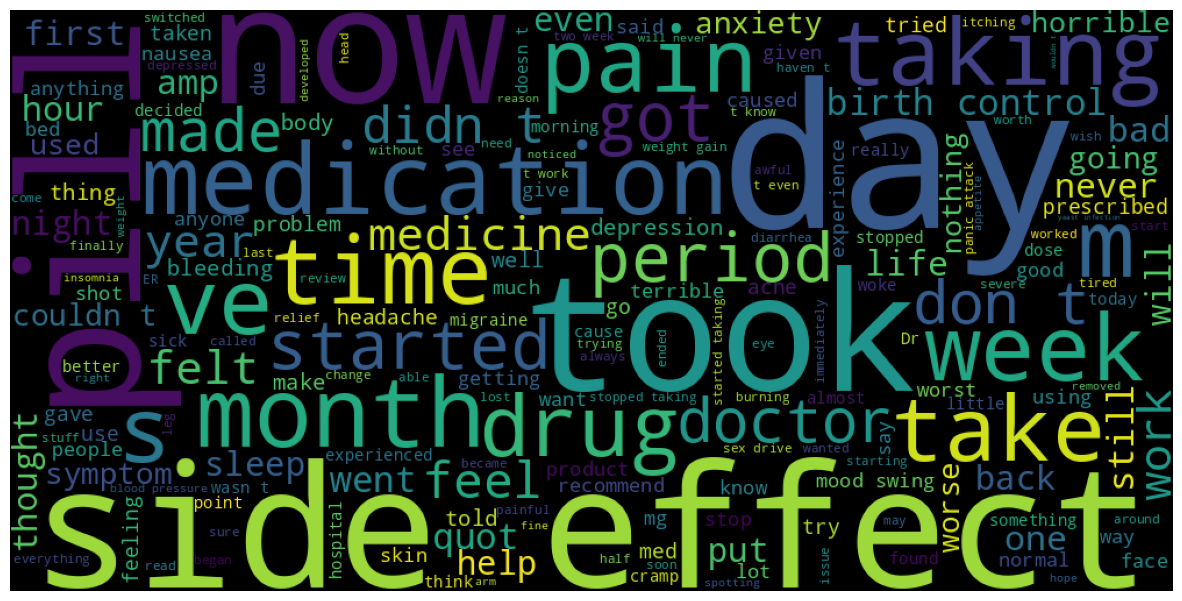

In [ ]:
# Word cloud of the reviews with rating equal to 1
df_rate_one = df_data.loc[df_data.rating == 1, 'review']
k1 = (' '.join(df_rate_one))

wordcloud = WordCloud(width = 1000, height = 500).generate(k1)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

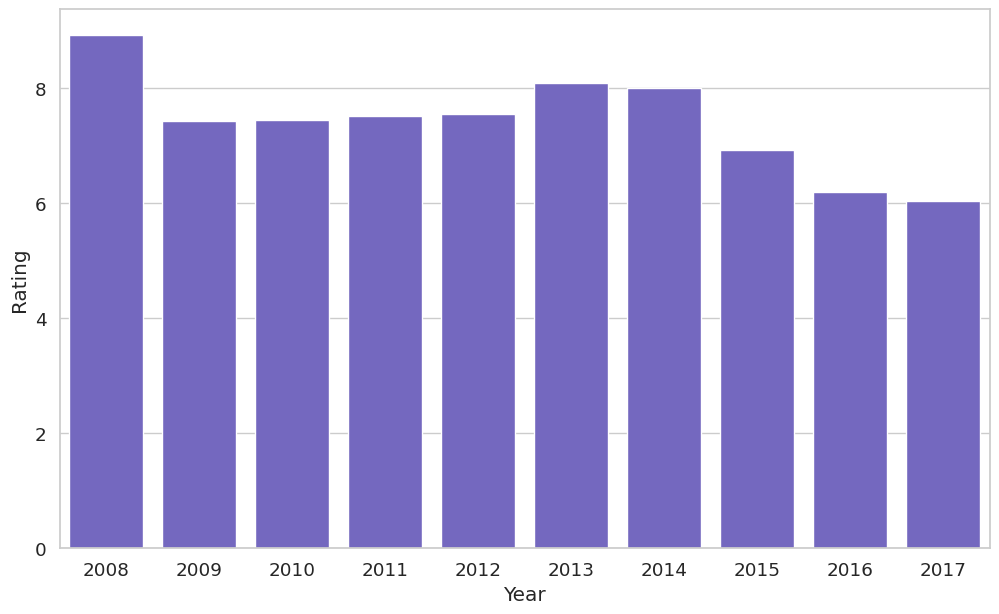

In [ ]:
# This barplot shows the mean rating per year

mean_rating = dict(df_data.groupby(df_data['date'].dt.year)['rating'].mean())
plt.rcParams['figure.figsize'] = [12, 7]
sns.set(font_scale = 1.2, style = 'whitegrid')
sns_ = sns.barplot(x = list(mean_rating.keys()), y = list(mean_rating.values()), color = 'slateblue');
sns_.set_xlabel('Year')
sns_.set_ylabel('Rating');

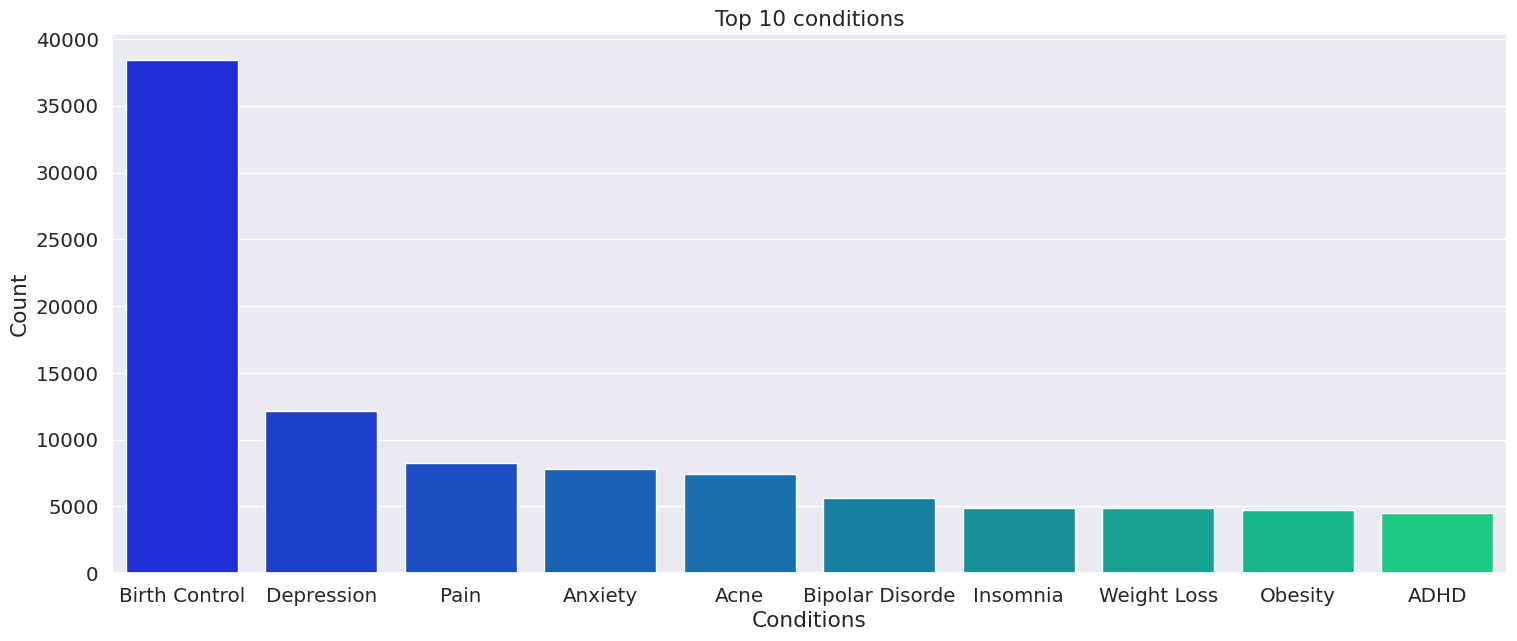

In [ ]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(df_data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

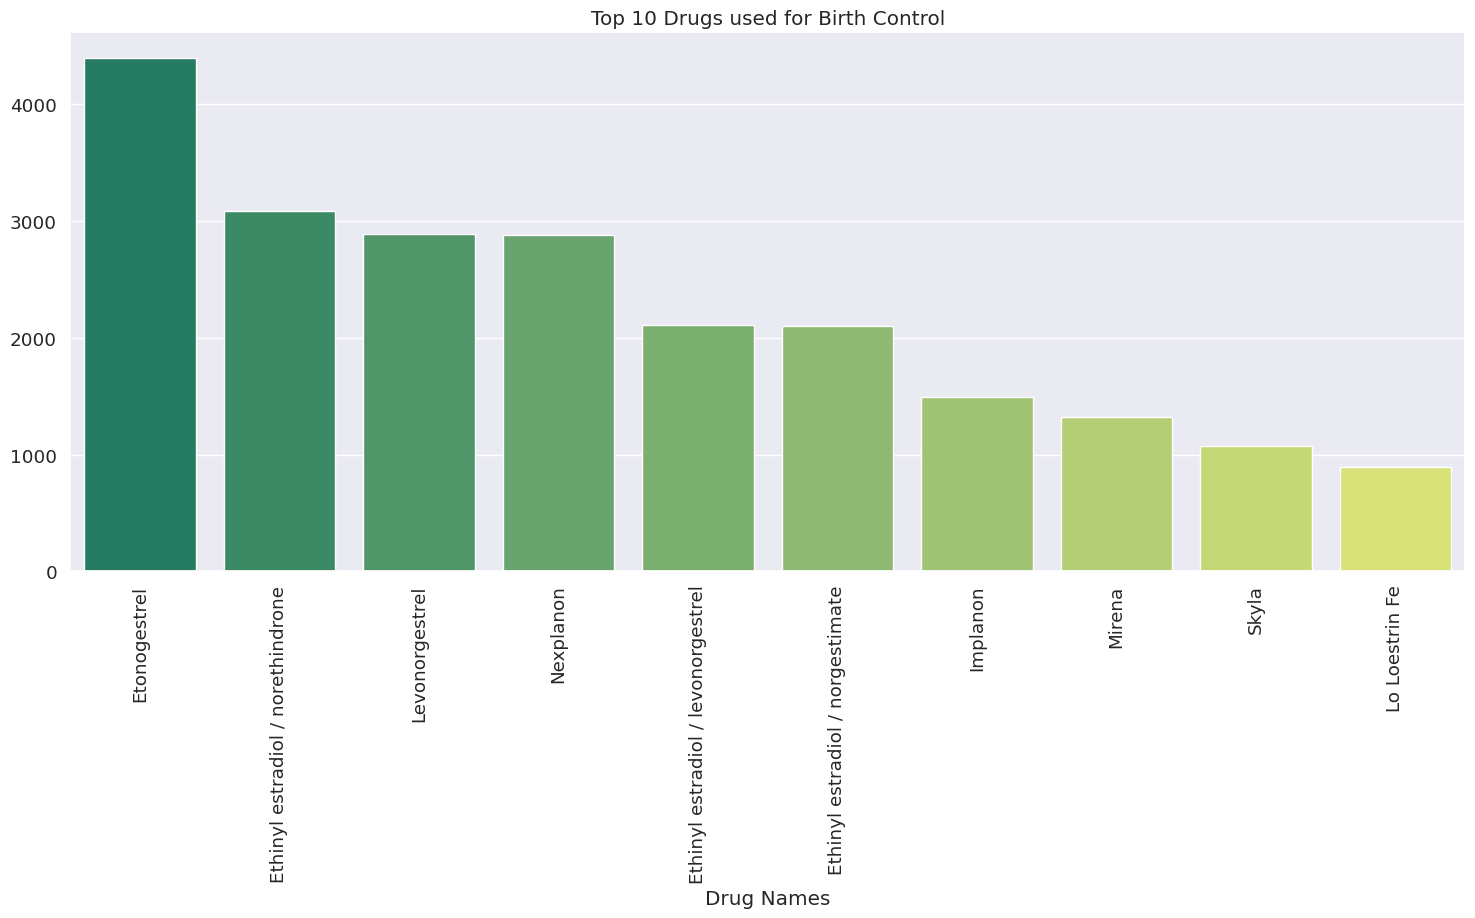

In [ ]:
# Top 10 drugs which are used for the top condition, that is Birth Control
df = df_data[df_data['condition'] == 'Birth Control']['drugname'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df.index, y = df.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

<Axes: xlabel='usefulcount', ylabel='Density'>

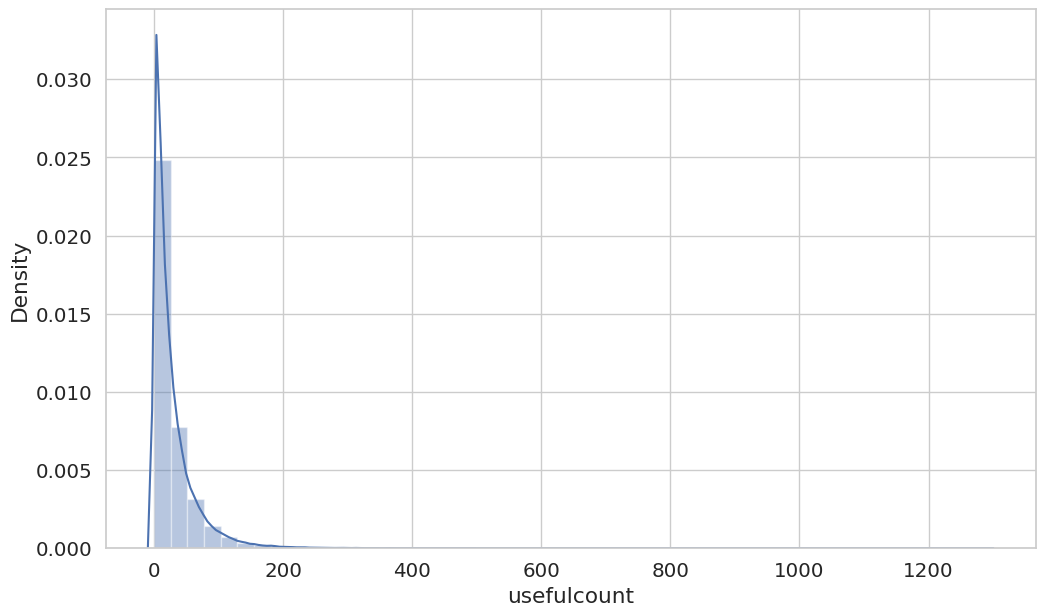

In [ ]:
# Distribution of the useful count
sns.set(style = 'whitegrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [12, 7]
sns.distplot(df_data['usefulcount'].dropna())

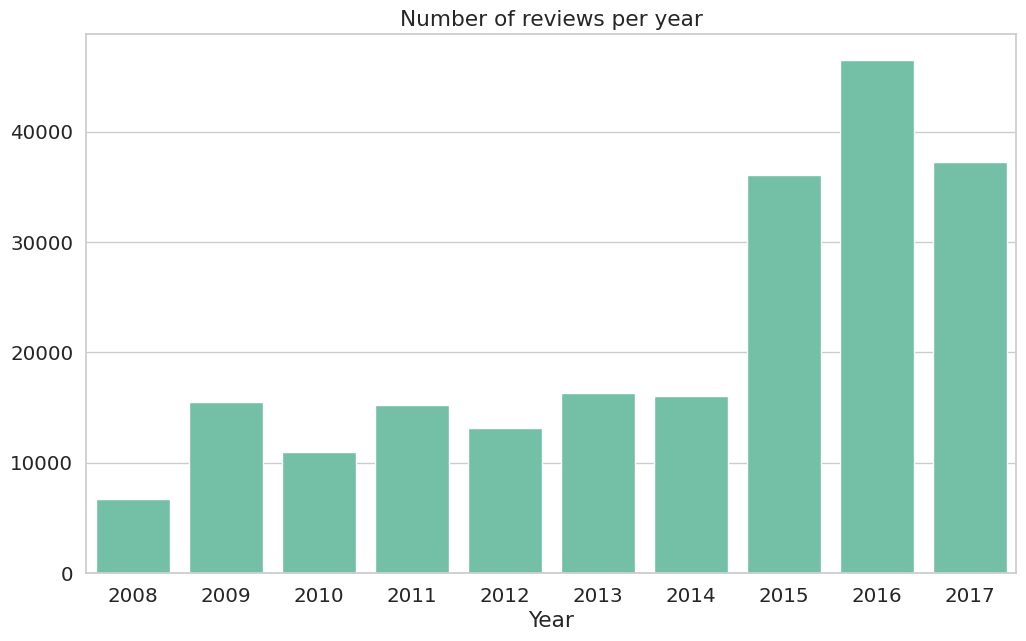

In [ ]:
# This barplot shows the number of reviews per year
df = df_data['date'].dt.year.value_counts()
df = df.sort_index()

sns_ = sns.barplot(x = df.index, y = df.values, color = 'mediumaquamarine')
sns_.set_title("Number of reviews per year")
sns_.set_xlabel("Year");

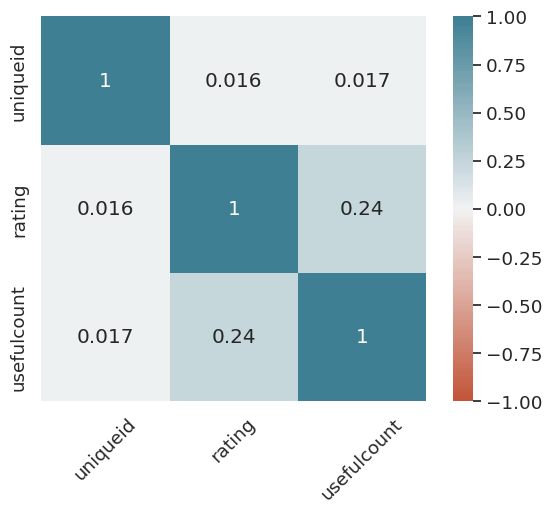

In [ ]:
# Heatmap of the correlation matrix
plt.rcParams['figure.figsize'] = [7,5]
sns.set(font_scale = 1.2)
corr = df_data.select_dtypes(include = 'int64').corr()
sns_heat = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200), square=True);
plt.setp(sns_heat.get_xticklabels(), rotation = 45);

In [ ]:
df_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

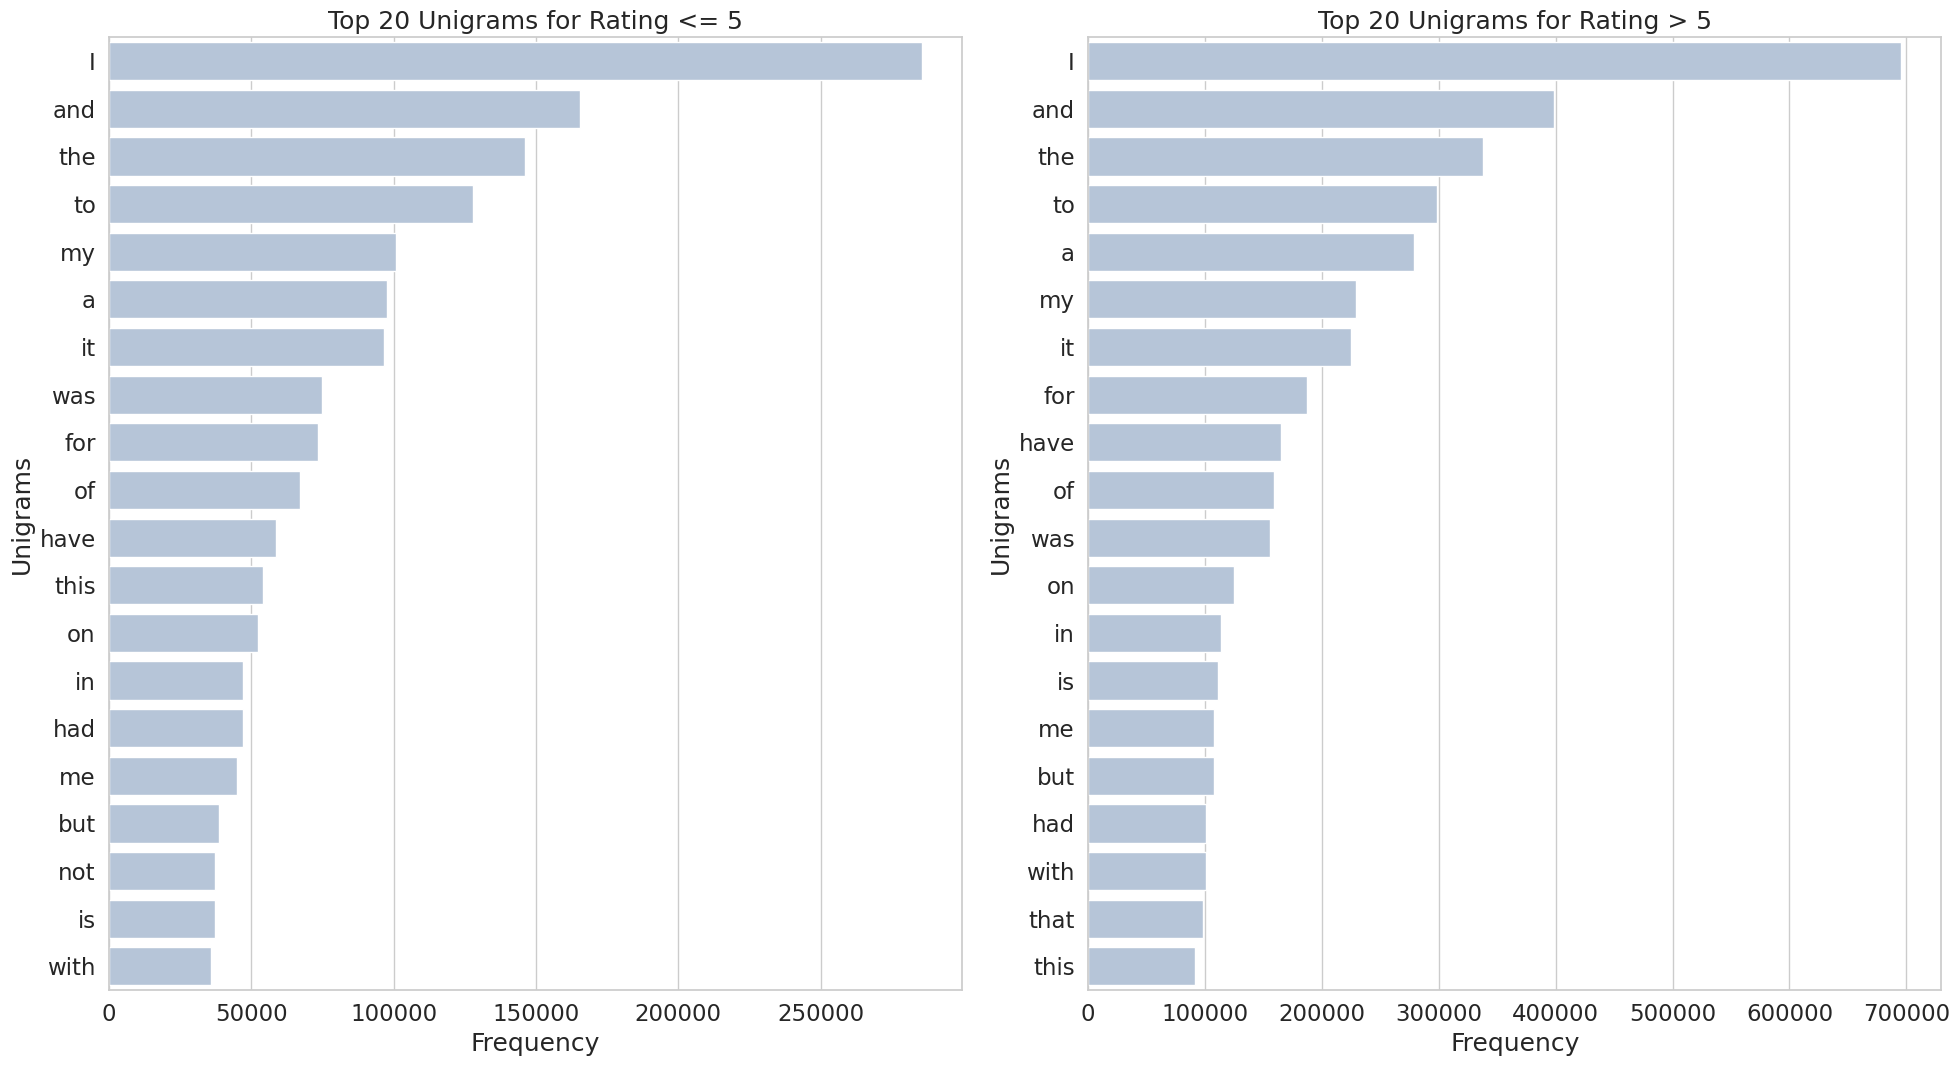

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk import word_tokenize, ngrams

# df_data is assumed to be the input dataset with 'rating' and 'review' columns
df_ = df_data[['rating', 'review']].copy()

# Remove specific encoding issues and punctuation
df_['review'] = df_['review'].str.replace("&#039;", "")
df_['review'] = df_['review'].str.replace(r'[^\w\d\s]', ' ', regex=True)

# Combine reviews based on rating conditions
df_review_5 = " ".join(df_.loc[df_.rating <= 5, 'review'])
df_review_10 = " ".join(df_.loc[df_.rating > 5, 'review'])

# Tokenize the reviews
token_review_5 = word_tokenize(df_review_5)
token_review_10 = word_tokenize(df_review_10)

# Create unigrams (1-grams) and flatten the tuple
unigrams_5 = [unigram[0] for unigram in ngrams(token_review_5, 1)]
unigrams_10 = [unigram[0] for unigram in ngrams(token_review_10, 1)]

# Count the frequency of unigrams
frequency_5 = Counter(unigrams_5)
frequency_10 = Counter(unigrams_10)

# Create DataFrames for the top 20 unigrams with proper column names
df_5 = pd.DataFrame(frequency_5.most_common(20), columns=['Unigram', 'Frequency'])
df_10 = pd.DataFrame(frequency_10.most_common(20), columns=['Unigram', 'Frequency'])

# Barplot that shows the top 20 unigrams
plt.rcParams['figure.figsize'] = [20, 11]
fig, ax = plt.subplots(1, 2)
sns.set(font_scale=1.5, style='whitegrid')

# Create the barplots for ratings <= 5 and > 5
sns_5 = sns.barplot(x='Frequency', y='Unigram', data=df_5, color='lightsteelblue', ax=ax[0])
sns_10 = sns.barplot(x='Frequency', y='Unigram', data=df_10, color='lightsteelblue', ax=ax[1])

# Set titles and labels for the plots
sns_5.set_title("Top 20 Unigrams for Rating <= 5")
sns_10.set_title("Top 20 Unigrams for Rating > 5")
sns_5.set_ylabel("Unigrams")
sns_10.set_ylabel("Unigrams")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


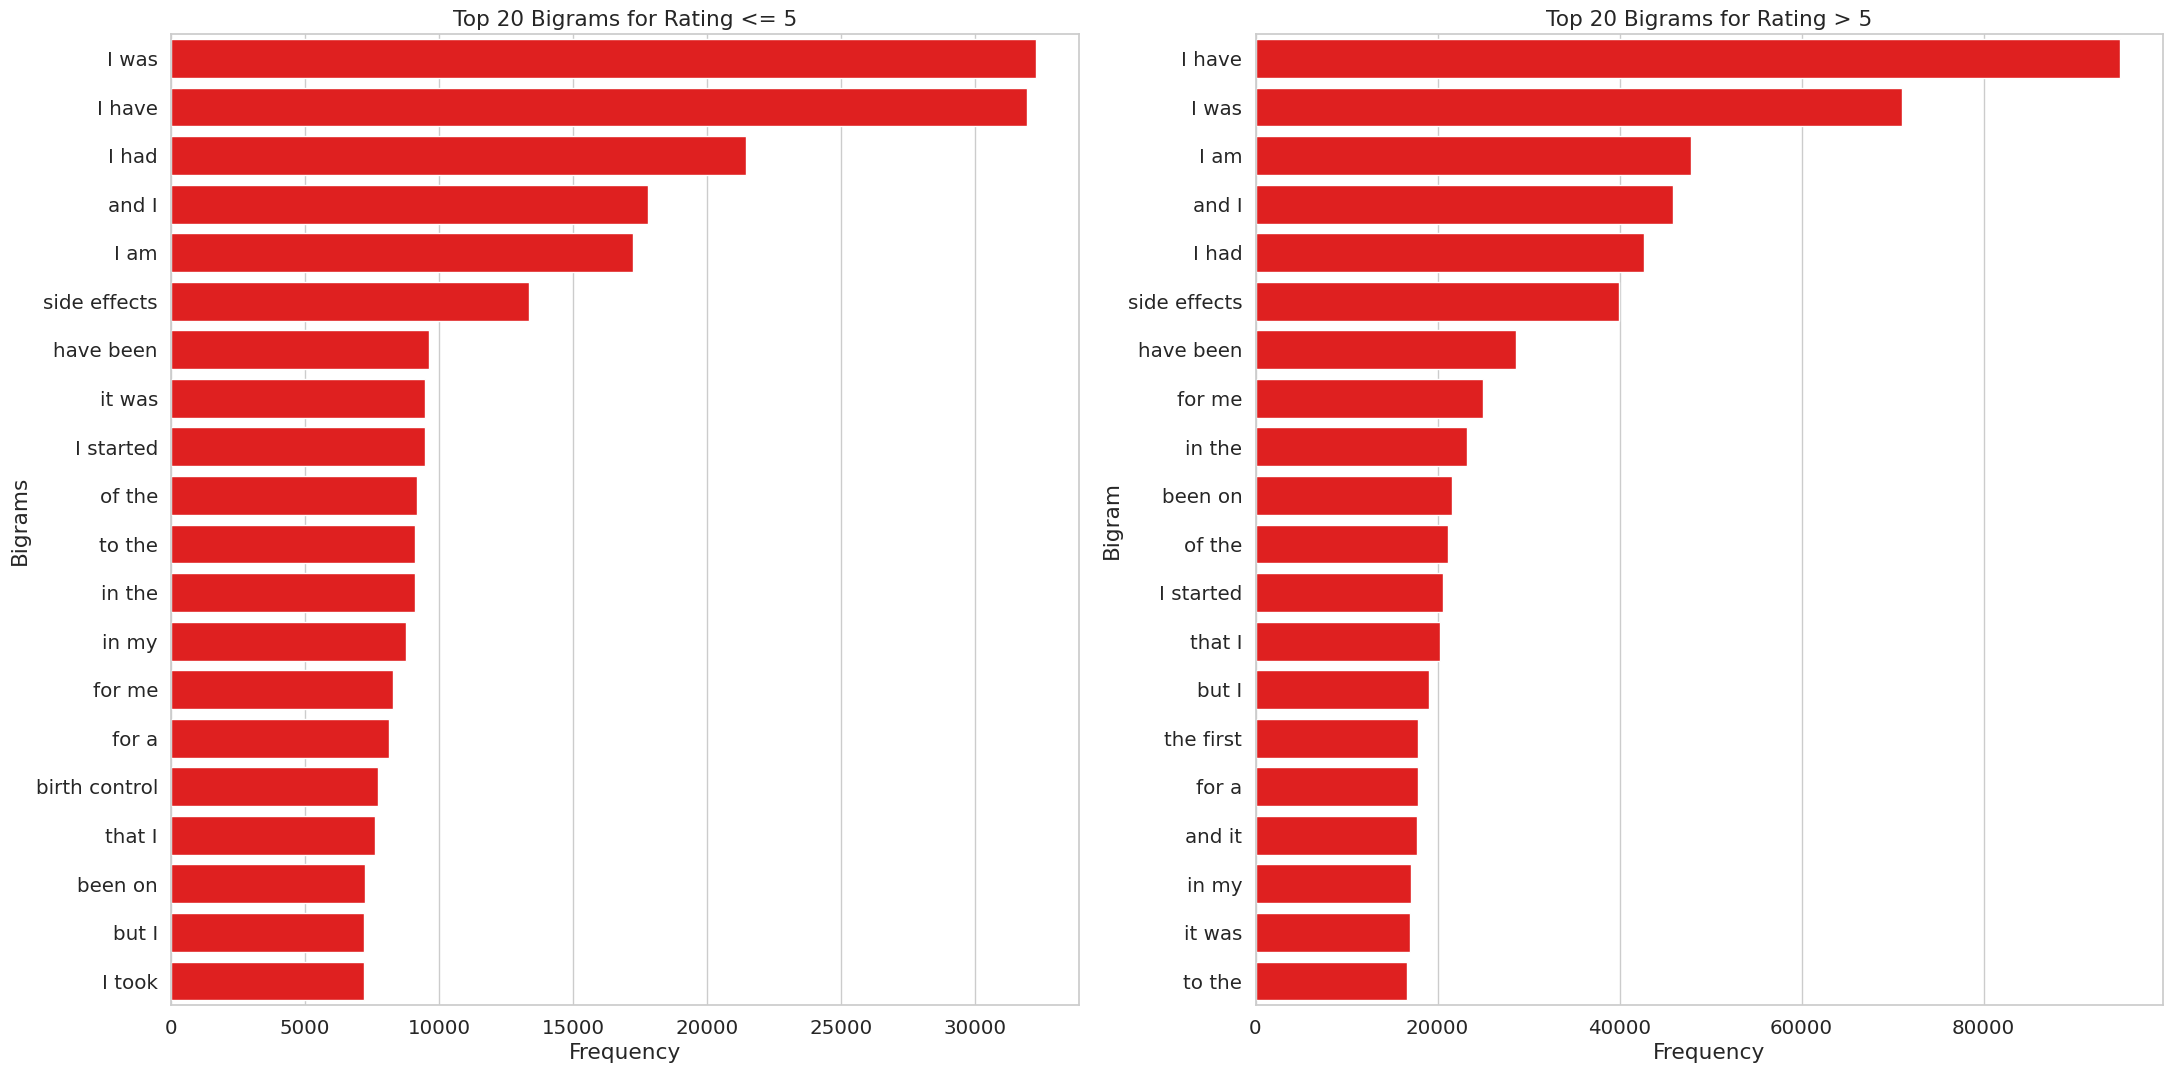

In [ ]:
# Create bigrams (2-grams) and flatten the tuple
bigrams_5 = [' '.join(bigram) for bigram in ngrams(token_review_5, 2)]
bigrams_10 = [' '.join(bigram) for bigram in ngrams(token_review_10, 2)]

# Count the frequency of bigrams
frequency_5 = Counter(bigrams_5)
frequency_10 = Counter(bigrams_10)

# Create DataFrames for the top 20 bigrams with proper column names
df_5 = pd.DataFrame(frequency_5.most_common(20), columns=['Bigram', 'Frequency'])
df_10 = pd.DataFrame(frequency_10.most_common(20), columns=['Bigram', 'Frequency'])

# Barplot that shows the top 20 bigrams
plt.rcParams['figure.figsize'] = [22, 11]
fig, ax = plt.subplots(1, 2)
sns.set(font_scale=1.3, style='whitegrid')

# Create the barplots for ratings <= 5 and > 5
sns_5 = sns.barplot(x='Frequency', y='Bigram', data=df_5, color='red', ax=ax[0])
sns_10 = sns.barplot(x='Frequency', y='Bigram', data=df_10, color='red', ax=ax[1])

# Set titles and labels for the plots
sns_5.set_title("Top 20 Bigrams for Rating <= 5")
sns_10.set_title("Top 20 Bigrams for Rating > 5")
sns_5.set_ylabel("Bigrams")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


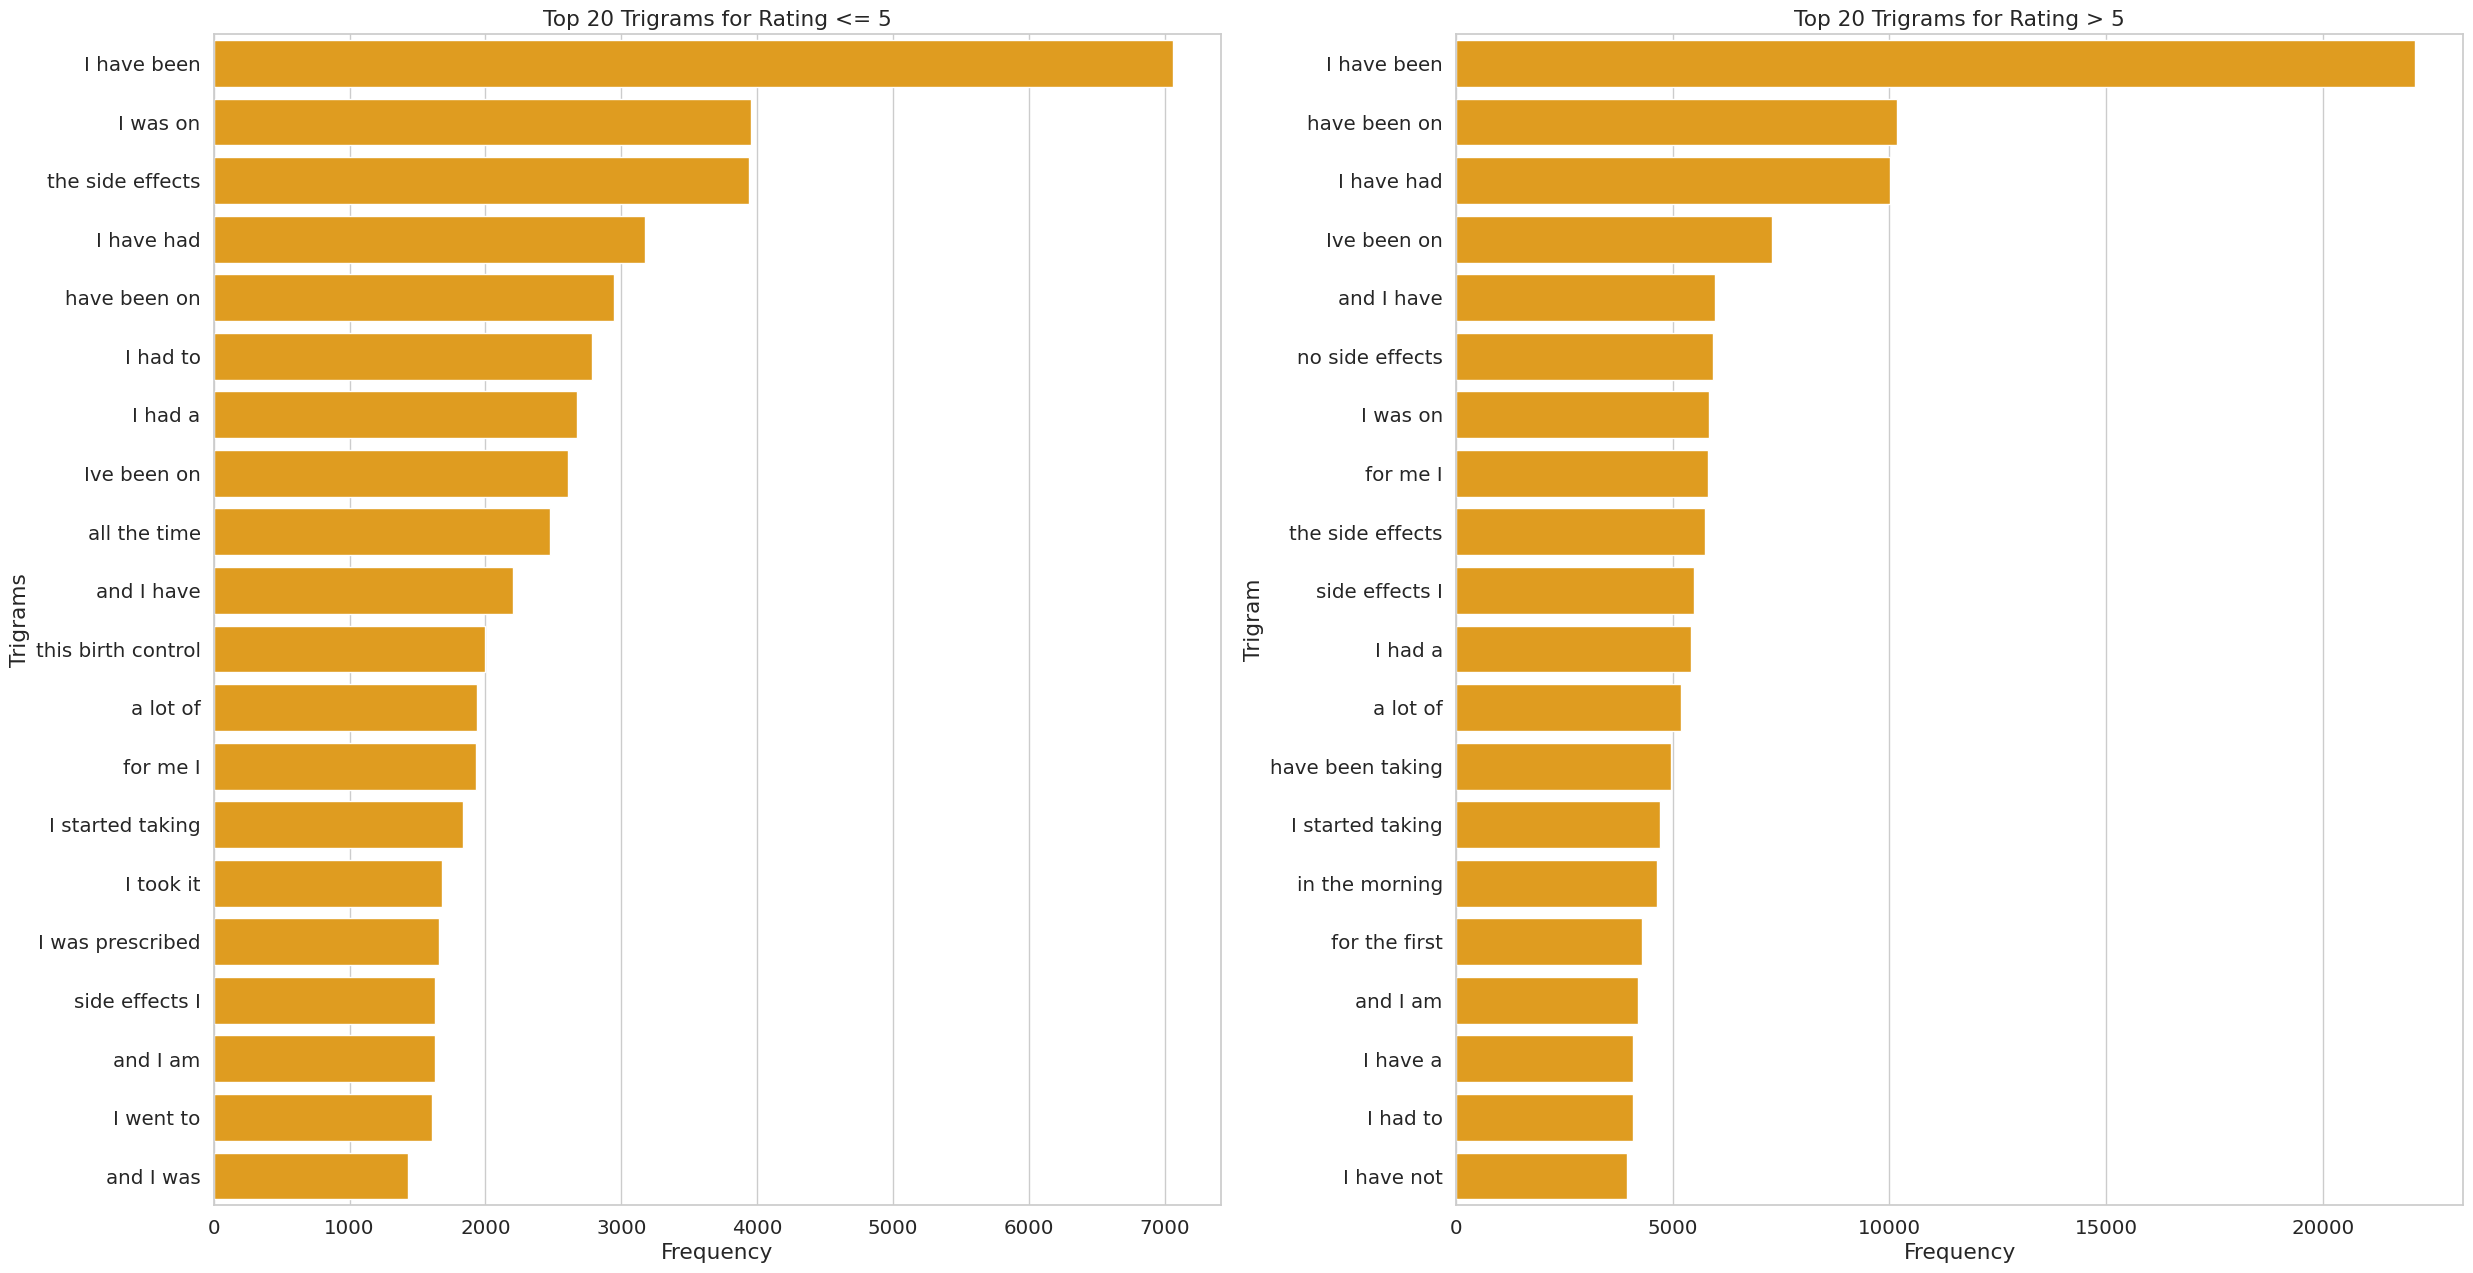

In [ ]:
# Create trigrams (3-grams) and flatten the tuple
trigrams_5 = [' '.join(trigram) for trigram in ngrams(token_review_5, 3)]
trigrams_10 = [' '.join(trigram) for trigram in ngrams(token_review_10, 3)]

# Count the frequency of trigrams
frequency_5 = Counter(trigrams_5)
frequency_10 = Counter(trigrams_10)

# Create DataFrames for the top 20 trigrams with proper column names
df_5 = pd.DataFrame(frequency_5.most_common(20), columns=['Trigram', 'Frequency'])
df_10 = pd.DataFrame(frequency_10.most_common(20), columns=['Trigram', 'Frequency'])

# Barplot that shows the top 20 trigrams
plt.rcParams['figure.figsize'] = [25, 13]
fig, ax = plt.subplots(1, 2)
sns.set(font_scale=1.3, style='whitegrid')

# Create the barplots for ratings <= 5 and > 5
sns_5 = sns.barplot(x='Frequency', y='Trigram', data=df_5, color='orange', ax=ax[0])
sns_10 = sns.barplot(x='Frequency', y='Trigram', data=df_10, color='orange', ax=ax[1])

# Set titles and labels for the plots
sns_5.set_title("Top 20 Trigrams for Rating <= 5")
sns_10.set_title("Top 20 Trigrams for Rating > 5")
sns_5.set_ylabel("Trigrams")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


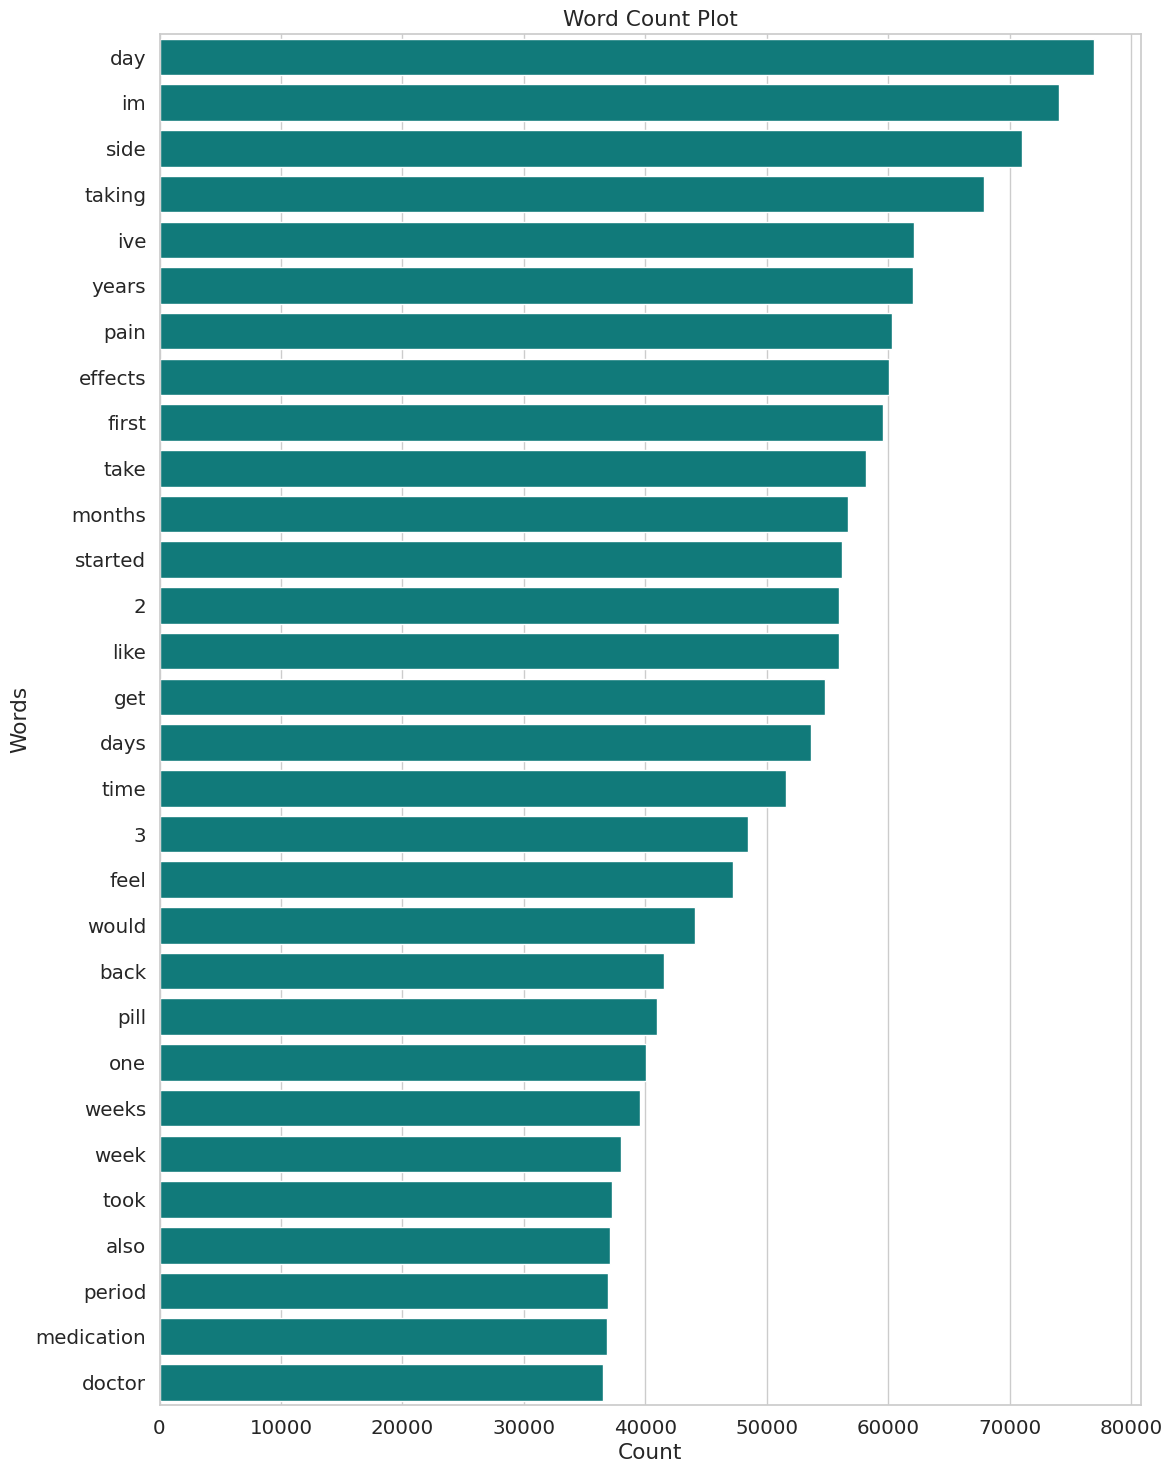

In [ ]:
# Word count plot

nltk.download('stopwords')

# Removing the stop words before plotting
stop_words = set(stopwords.words('english'))
df_['review'] = df_['review'].str.lower()
df_['review_1'] = df_['review'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))
df_review = " ".join(df_['review_1'])
tokenize = word_tokenize(df_review)
frequency = Counter(tokenize)
df = pd.DataFrame(frequency.most_common(30))

plt.rcParams['figure.figsize'] = [12, 15]
sns.set(font_scale=1.3, style='whitegrid')

# Plotting
word_count = sns.barplot(x=df[1], y=df[0], color='darkcyan')
word_count.set_title("Word Count Plot")
word_count.set_ylabel("Words")
word_count.set_xlabel("Count")

plt.tight_layout()  # To improve the layout
plt.show()

# Preprocessing the reviews for the best polarity and classification

In [ ]:
# Giving the Sentiment according to the ratings
df_data['sentiment_rate'] = df_data['rating'].apply(lambda x: 1 if x > 5 else 0)

In [ ]:
def review_clean(review):
    # changing to lower case
    lower = review.str.lower()

    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")

    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')

    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')

    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')

    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')

    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')

    return dataframe

In [ ]:
#df_data['review_clean'] = df_data['review'].apply(review_clean)
df_data['review_clean'] = review_clean(df_data['review'])

In [ ]:
# Removing the stopwords
stop_words = set(stopwords.words('english'))
df_data['review_clean'] = df_data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [ ]:
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
df_data['review_clean'] = df_data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [ ]:
df_data['review_clean'][0: 20]

,review_clean
0,"""been depo inject sinc januari 2015, bleed sto..."
1,"""im 21 year old recent found might pcos. haven..."
2,"""i shot 11 year month ago, never 1 period even..."
3,"""ive four shot point. birth control pill year ..."
4,"""i total 3 shots. got first one leav hospit gi..."
5,"""this horribl shot!! got first shot august, ev..."
6,"""im 18 got heavi bleeding. ive alway heard bc ..."
7,"""im 19 heavi pain period sinc forever! got dep..."
8,"""im 30 year old woman. got shot august 9th. bl..."
9,"""im 17 year old got shot august 2015, personal..."


In [ ]:
# Separating the day, month and year from the Date
df_data['day'] = df_data['date'].dt.day
df_data['month'] = df_data['date'].dt.month
df_data['year'] = df_data['date'].dt.year

In [ ]:
df_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,day,month,year
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4,0,"""been depo inject sinc januari 2015, bleed sto...",28,10,2015
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,1,"""im 21 year old recent found might pcos. haven...",27,10,2015
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,1,"""i shot 11 year month ago, never 1 period even...",27,10,2015
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,1,"""ive four shot point. birth control pill year ...",26,10,2015
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,0,"""i total 3 shots. got first one leav hospit gi...",25,10,2015


In [ ]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [ ]:
df_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,day,month,year
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4,0,"""been depo inject sinc januari 2015, bleed sto...",28,10,2015
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,1,"""im 21 year old recent found might pcos. haven...",27,10,2015
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,1,"""i shot 11 year month ago, never 1 period even...",27,10,2015
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,1,"""ive four shot point. birth control pill year ...",26,10,2015
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,0,"""i total 3 shots. got first one leav hospit gi...",25,10,2015


In [ ]:
df_data['sentiment'] = sentiment(df_data['review'])

In [ ]:
df_data['sentiment_clean'] = sentiment(df_data['review_clean'])

The Correlation coefficient between the sentiment of the uncleaned review with rating is greater than the cleaned review, so now lets try without the snowball stemmer and without removing the stopwords.

In [ ]:
np.corrcoef(df_data['sentiment'], df_data['rating'])

array([[1.       , 0.3481753],
       [0.3481753, 1.       ]])

In [ ]:
np.corrcoef(df_data['sentiment_clean'], df_data['rating'])

array([[1.        , 0.28800168],
       [0.28800168, 1.        ]])

In [ ]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
df_data['review_clean_ss'] = review_clean(df_data['review'])
df_data['sentiment_clean_ss'] = sentiment(df_data['review_clean_ss'])

In [ ]:
np.corrcoef(df_data['sentiment_clean_ss'], df_data['rating'])

array([[1.        , 0.34832859],
       [0.34832859, 1.        ]])

In [ ]:
df_data['condition'].value_counts().head(20)

,count
condition,
Birth Control,38436
Depression,12164
Pain,8245
Anxiety,7812
Acne,7435
Bipolar Disorde,5604
Insomnia,4904
Weight Loss,4857
Obesity,4757


In [ ]:
df_data.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,day,month,year,sentiment,sentiment_clean,review_clean_ss,sentiment_clean_ss
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4,0,"""been depo inject sinc januari 2015, bleed sto...",28,10,2015,-0.287798,-0.254464,"""been on the depo injection since january 2015...",-0.287798
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,1,"""im 21 year old recent found might pcos. haven...",27,10,2015,0.175357,0.161429,"""im 21 years old and recently found out i migh...",0.175357
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,1,"""i shot 11 year month ago, never 1 period even...",27,10,2015,-0.210000,0.233333,"""i have been on the shot 11 years and until a ...",-0.210000
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,1,"""ive four shot point. birth control pill year ...",26,10,2015,-0.022500,0.070000,"""ive had four shots at this point. i was on bi...",-0.022500
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,0,"""i total 3 shots. got first one leav hospit gi...",25,10,2015,0.044872,0.103333,"""i had a total of 3 shots. i got my first one ...",0.044872
5,6,Medroxyprogesterone,Birth Control,"""This is a horrible shot!! I got my first shot...",1,2015-10-24,3,0,"""this horribl shot!! got first shot august, ev...",24,10,2015,0.000321,0.058712,"""this is a horrible shot!! i got my first shot...",0.000321
6,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,2015-10-22,6,0,"""im 18 got heavi bleeding. ive alway heard bc ...",22,10,2015,-0.056692,-0.026705,"""im 18 and got this for heavy bleeding. ive al...",-0.056692
7,8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Im 19 and have been having heavy and painful ...",5,2015-10-21,2,0,"""im 19 heavi pain period sinc forever! got dep...",21,10,2015,0.030995,0.097241,"""im 19 and have been having heavy and painful ...",0.030995
8,9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m a 30 year old woman. I got the shot ...",2,2015-10-21,5,0,"""im 30 year old woman. got shot august 9th. bl...",21,10,2015,0.265309,0.225397,"""im a 30 year old woman. i got the shot on aug...",0.265309
9,10,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 17 years old and I got shot in Augus...",7,2015-10-20,2,1,"""im 17 year old got shot august 2015, personal...",20,10,2015,-0.047222,-0.018750,"""im 17 years old and i got shot in august 2015...",-0.047222


# Feature Engineering

In [ ]:
#Word count in each review
df_data['count_word']=df_data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count
df_data['count_unique_word']=df_data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
df_data['count_letters']=df_data["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
df_data["count_punctuations"] = df_data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df_data["count_words_upper"] = df_data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df_data["count_words_title"] = df_data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df_data["count_stopwords"] = df_data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
df_data["mean_word_len"] = df_data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [ ]:
df_data.columns

Index(['uniqueid', 'drugname', 'condition', 'review', 'rating', 'date',
       'usefulcount', 'sentiment_rate', 'review_clean', 'day', 'month', 'year',
       'sentiment', 'sentiment_clean', 'review_clean_ss', 'sentiment_clean_ss',
       'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_upper', 'count_words_title',
       'count_stopwords', 'mean_word_len'],
      dtype='object')

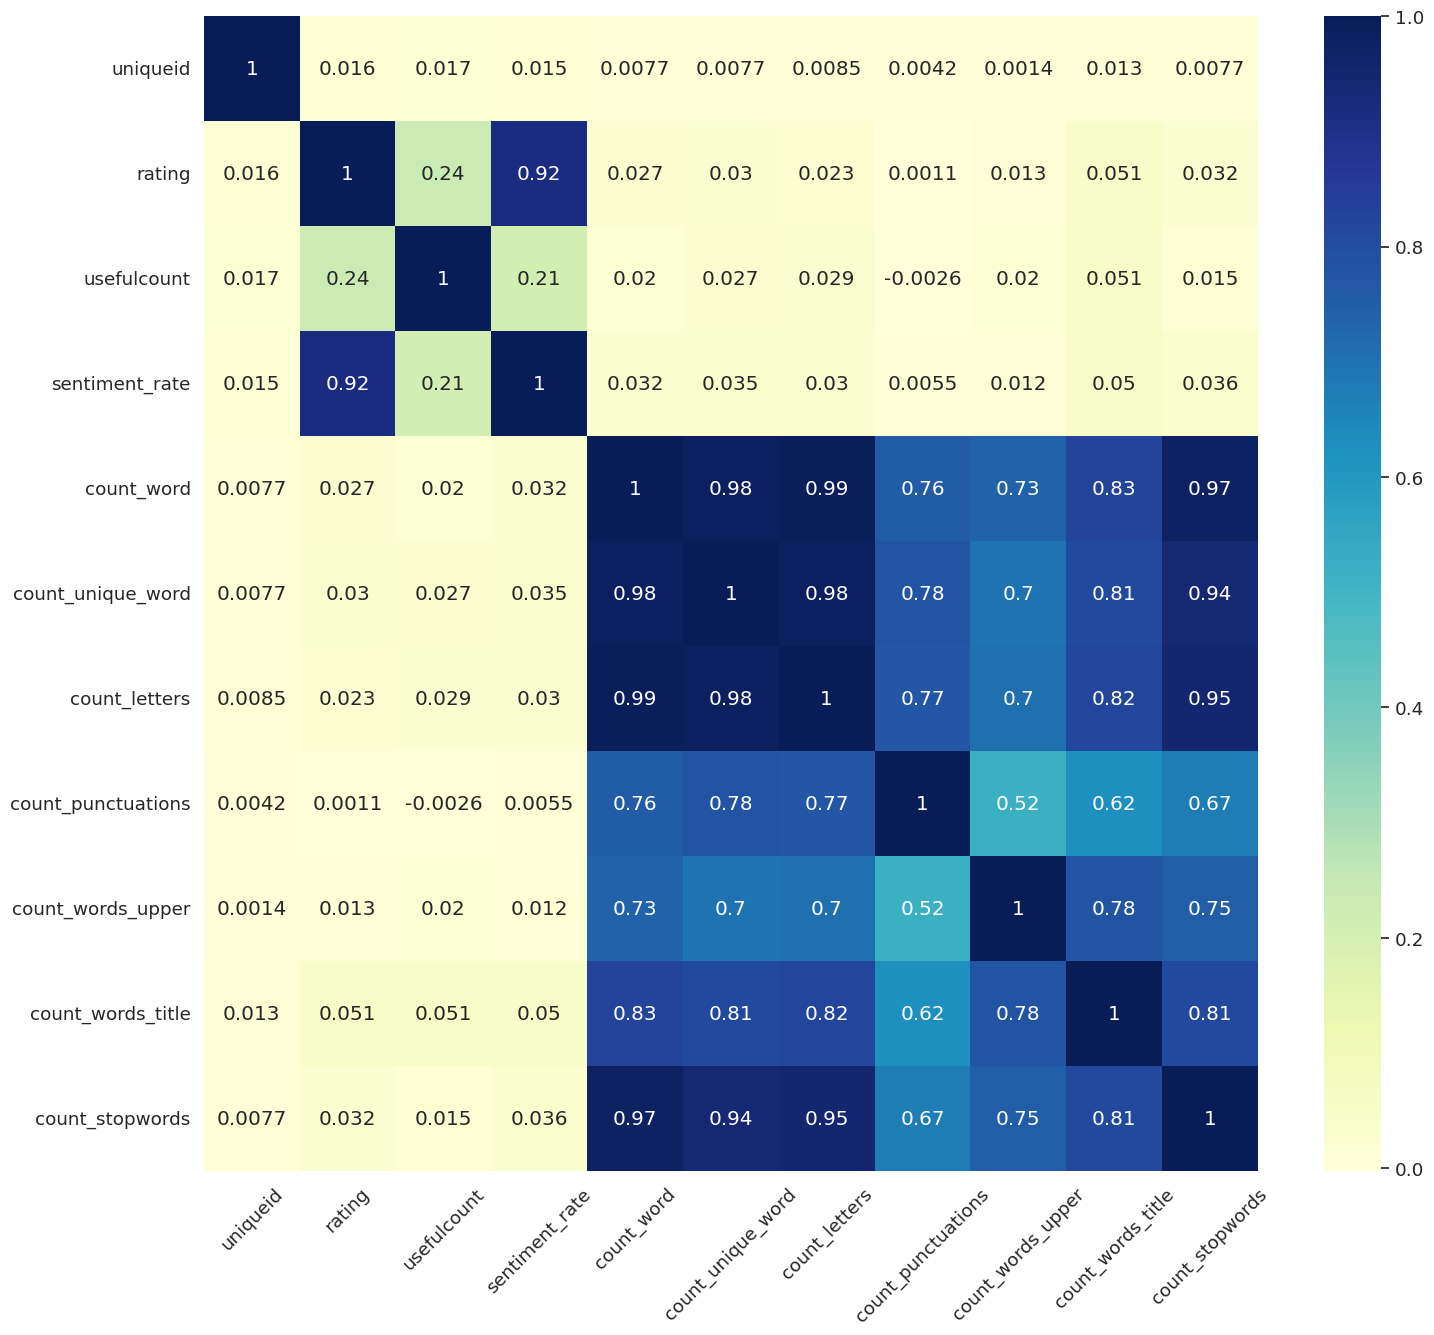

In [ ]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = df_data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.setp(sns_.get_xticklabels(), rotation = 45);

In [ ]:
# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugname', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    df_data[feature] = label_encoder_feat[feature].fit_transform(df_data[feature])

# Modelling

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.9 MB/s eta 0:00:00


In [ ]:
# Importing Libraries for the Machine Learning Model
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# Defining Features and splitting the data as train and test set

features = df_data[['condition', 'usefulcount', 'sentiment', 'day', 'month', 'year',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = df_data['sentiment_rate']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (149708, 15)
The Test set size  (64161, 15)


**Model-1 LightGBM**

In [ ]:
# Training Model-1
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.8872056233537507
The confusion Matrix is 


array([[14718,  4627],
       [ 2610, 42206]])

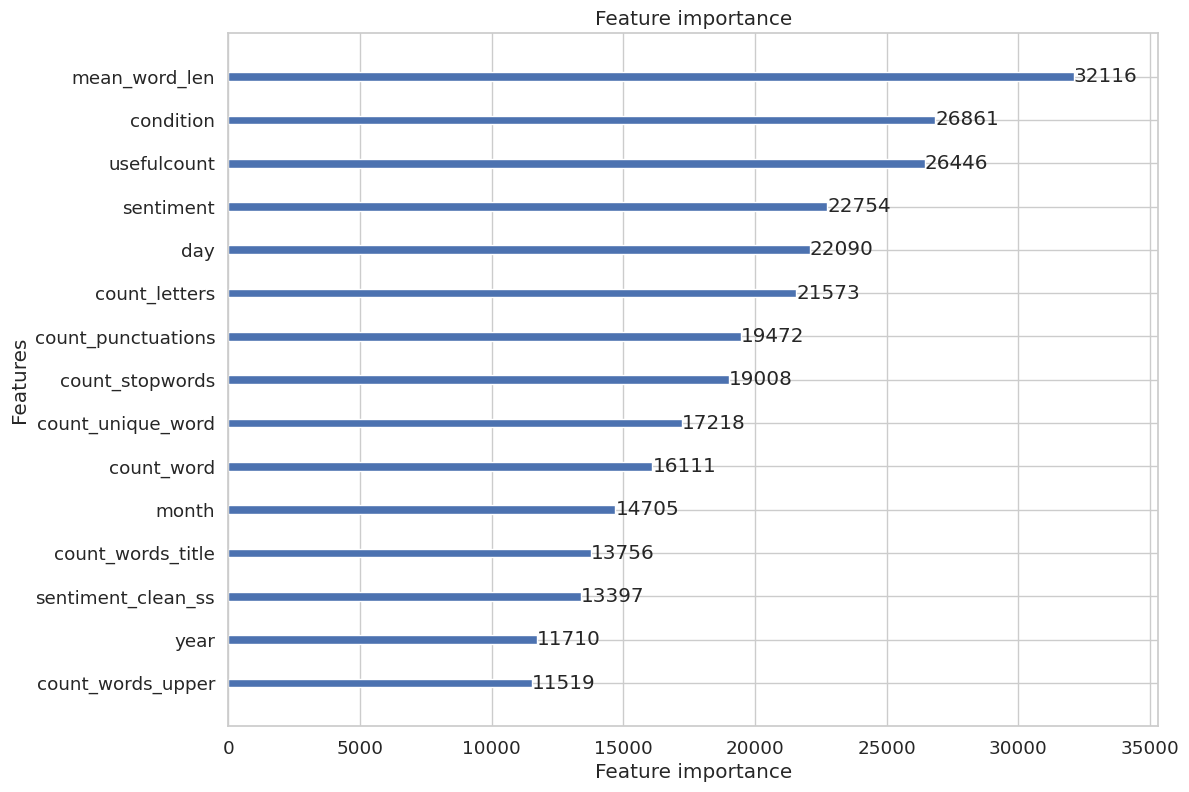

In [ ]:
# Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'whitegrid', font_scale = 1.2)
plot_importance(model);

**Model-2 XGB Classifier**

In [ ]:
# Training Model - 2
from xgboost import plot_importance
xgb_clf = XGBClassifier(n_estimator = 10000,
                    learning_rate=0.10,
                    num_leaves=30)

model_xgb = xgb_clf.fit(X_train, y_train)

# Predictions
predictions_2 = model_xgb.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions_2))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions_2)

The Accuracy of the model is :  0.7677249419429248
The confusion Matrix is 


array([[ 8118, 11227],
       [ 3676, 41140]])

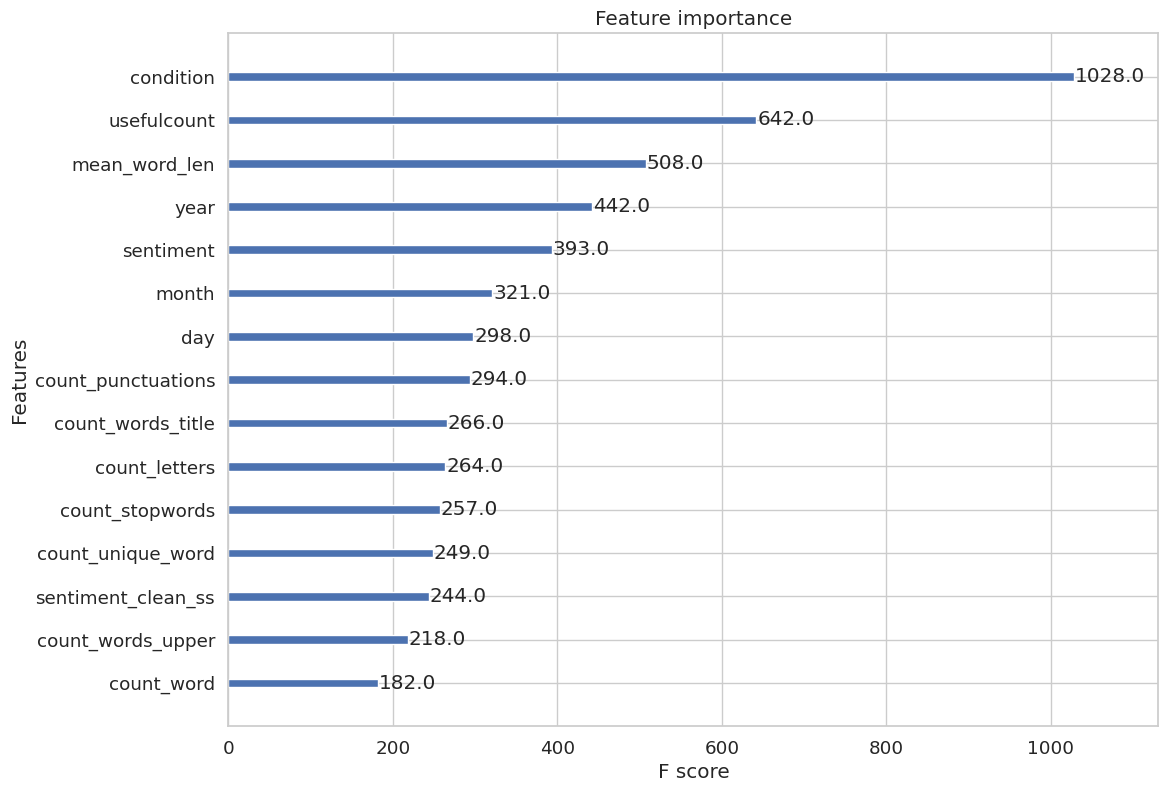

In [ ]:
# Feature Importance Plot using XGBClassifier
plt.rcParams['figure.figsize'] = [12, 9]
plot_importance(model_xgb);


**Model-3 CatBoostClassifier**

In [ ]:
# Training Model - 3
cat_clf = CatBoostClassifier(iterations = 10000,
                            learning_rate = 0.5)

model_cat = cat_clf.fit(X_train, y_train);

# Predictions
predictions_3 = model_cat.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions_3))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions_3)

Streaming output truncated to the last 5000 lines.
5002:	learn: 0.0553009	total: 4m 20s	remaining: 4m 19s
5003:	learn: 0.0552868	total: 4m 20s	remaining: 4m 19s
5004:	learn: 0.0552551	total: 4m 20s	remaining: 4m 19s
5005:	learn: 0.0552384	total: 4m 20s	remaining: 4m 19s
5006:	learn: 0.0552205	total: 4m 20s	remaining: 4m 19s
5007:	learn: 0.0551959	total: 4m 20s	remaining: 4m 19s
5008:	learn: 0.0551821	total: 4m 20s	remaining: 4m 19s
5009:	learn: 0.0551545	total: 4m 20s	remaining: 4m 19s
5010:	learn: 0.0551307	total: 4m 20s	remaining: 4m 19s
5011:	learn: 0.0551090	total: 4m 20s	remaining: 4m 19s
5012:	learn: 0.0550876	total: 4m 20s	remaining: 4m 19s
5013:	learn: 0.0550556	total: 4m 20s	remaining: 4m 19s
5014:	learn: 0.0550313	total: 4m 20s	remaining: 4m 19s
5015:	learn: 0.0550201	total: 4m 20s	remaining: 4m 18s
5016:	learn: 0.0549944	total: 4m 20s	remaining: 4m 18s
5017:	learn: 0.0549633	total: 4m 20s	remaining: 4m 18s
5018:	learn: 0.0549412	total: 4m 20s	remaining: 4m 18s
5019:	learn: 0

array([[14916,  4429],
       [ 3152, 41664]])